6-4. 자동 미분과 선형 회귀 실습

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w) :
    y = w**2
    z = 2*y + 5
    return z

In [3]:
with tf.GradientTape() as tape :
    z = f(w)
    
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


자동 미분을 이용한 선형 회귀 구현

In [4]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)
# 학습될 값이기 때문에 임의로 4, 1 로 설정

In [5]:
@tf.function
def hypothesis(x) :
    return w*x+b

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [7]:
@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred - y))

In [8]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [9]:
optimizer = tf.optimizers.SGD(0.01)
# 옵티마이저는 경사하강법을 사용하고, 학습률(learning rate)은 0.01을 사용

In [12]:
for i in range(301) :
    with tf.GradientTape() as tape :
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)
        
        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)
        
        # 손실 함수에 대한 파라미터의 미분값 계산
        gradients = tape.gradient(cost, [w, b])
        
        # 파라미터 업데이트
        optimizer.apply_gradients(zip(gradients, [w, b]))
        
        if i % 10 == 0 :
            print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [13]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())
# 위의 과정으로 학습된 w와 b의 값에 대해서 임의의 값을 넣었을 때의 결과

[38.35479  54.295143 59.608593 64.92204 ]


케라스로 구현하는 선형 회귀

In [14]:
# 예시 코드. 실행 불가.
model = Sequential()
model.add(keras.layers.Dense(1, input_dim = 1)) # 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 예측 모형

NameError: name 'Sequential' is not defined

In [20]:
# 공부한 시간 x , 공부한 시간에 따른 성적 y, activation은 어떤 함수를 사용할지 정하는데 선형모델은 linear 입력
# 옵티마이저로 경사하강법(sgd)사용, 학습률은 0.01, 손실함수로는 mse , 전체 데이터에 대한 훈련 횟수는 300으로 설정.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1, 입력 x의 차원(input_dim)은 1 , 선형 회귀 이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['mse']) # 손실 함수는 평균제곱오차 mse를 사용

model.fit(x, y, epochs=300) # 300번 반복

Epoch 1/300
1/1 [==============================] - 0s 243ms/step - loss: 3426.6860 - mse: 3426.6860
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 422.6763 - mse: 422.6763
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 53.0547 - mse: 53.0547
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 7.5746 - mse: 7.5746
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 1.9776 - mse: 1.9776
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2880 - mse: 1.2880
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2022 - mse: 1.2022
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1907 - mse: 1.1907
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1884 - mse: 1.1884
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1872 - mse: 1.1872
Epoch 11/300
1/1 [==============================] - 0s 7ms/step -

1/1 [==============================] - 0s 7ms/step - loss: 1.1263 - mse: 1.1263
Epoch 90/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1258 - mse: 1.1258
Epoch 91/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1252 - mse: 1.1252
Epoch 92/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1247 - mse: 1.1247
Epoch 93/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1241 - mse: 1.1241
Epoch 94/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1236 - mse: 1.1236
Epoch 95/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1231 - mse: 1.1231
Epoch 96/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1226 - mse: 1.1226
Epoch 97/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1221 - mse: 1.1221
Epoch 98/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1215 - mse: 1.1215
Epoch 99/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1210 - ms

1/1 [==============================] - 0s 6ms/step - loss: 1.0923 - mse: 1.0923
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0921 - mse: 1.0921
Epoch 178/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0918 - mse: 1.0918
Epoch 179/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0915 - mse: 1.0915
Epoch 180/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0913 - mse: 1.0913
Epoch 181/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0910 - mse: 1.0910
Epoch 182/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0908 - mse: 1.0908
Epoch 183/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0905 - mse: 1.0905
Epoch 184/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0903 - mse: 1.0903
Epoch 185/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0900 - mse: 1.0900
Epoch 186/300
1/1 [==============================] - 0s 6ms/step - loss: 1

1/1 [==============================] - 0s 6ms/step - loss: 1.0757 - mse: 1.0757
Epoch 264/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0756 - mse: 1.0756
Epoch 265/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0755 - mse: 1.0755
Epoch 266/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0753 - mse: 1.0753
Epoch 267/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0752 - mse: 1.0752
Epoch 268/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0751 - mse: 1.0751
Epoch 269/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0750 - mse: 1.0750
Epoch 270/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0748 - mse: 1.0748
Epoch 271/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0747 - mse: 1.0747
Epoch 272/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0746 - mse: 1.0746
Epoch 273/300
1/1 [==============================] - 0s 5ms/step - loss: 1

1/1 [==============================] - 0s 54ms/step


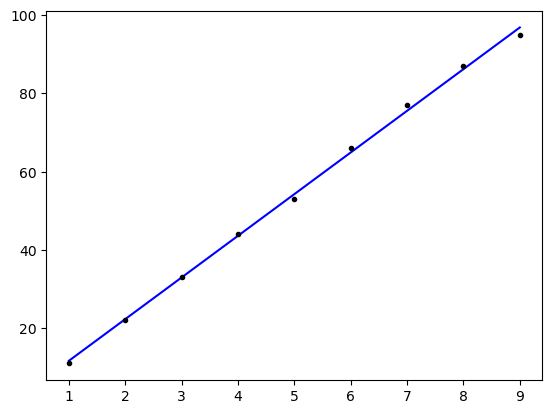

In [21]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [22]:
print(model.predict([9.5])) # 시험 공부를 9시간 30분을 했을 때 시험 성적을 예측.

1/1 [==============================] - 0s 52ms/step
[[102.17758]]


9시간 30분을 공부하면 약 102.18점을 얻는다고 예측 할 수 있다.